In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('flights')

In [3]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
df.shape

(144, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [6]:
df.isnull().sum()
df.duplicated().sum()

0

Bivarient Analysis

<Axes: xlabel='month', ylabel='passengers'>

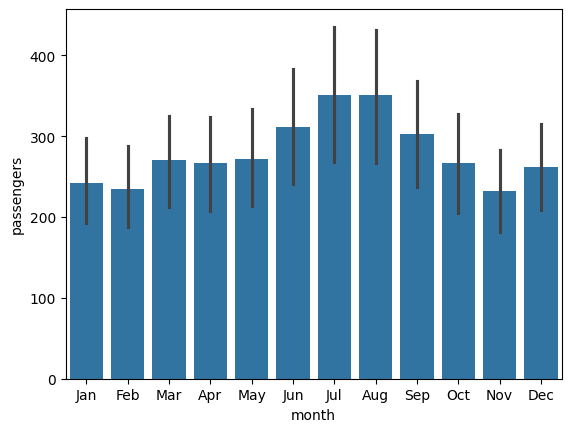

In [7]:
sns.barplot(x=df['month'], y=df['passengers'])

/tmp/ipykernel_221582/2093878987.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['passengers'])


<Axes: ylabel='Density'>

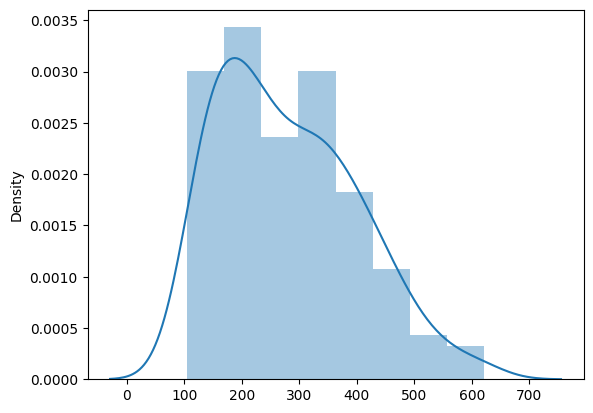

In [8]:
sns.distplot(x=df['passengers'])

In [9]:
df['passengers'].skew()

0.5831604861560892

In [39]:
year_wise = df.groupby('year')['passengers'].sum().reset_index()

In [44]:
month_wise = df.groupby('month')['passengers'].sum().reset_index()

/tmp/ipykernel_1118301/101881973.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_wise = df.groupby('month')['passengers'].sum().reset_index()


<Axes: xlabel='year', ylabel='passengers'>

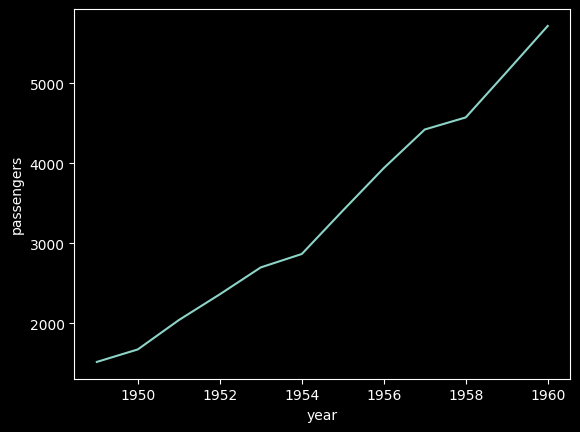

In [49]:
sns.lineplot(y=year_wise['passengers'], x=year_wise['year'])

<Axes: xlabel='month', ylabel='passengers'>

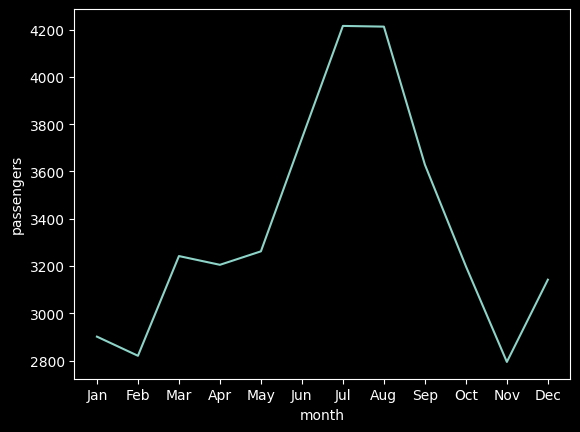

In [50]:
sns.lineplot(y=month_wise['passengers'], x=month_wise['month'])

<Axes: xlabel='month', ylabel='passengers'>

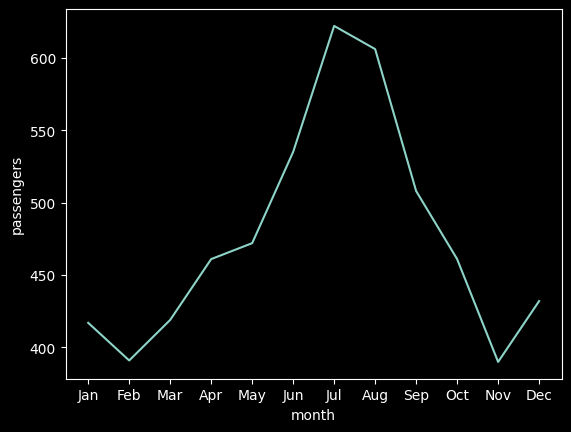

In [75]:
df[df['year'] == 1960]
sns.lineplot(x=df[df['year'] == 1960]['month'], y=df[df['year'] == 1960]['passengers'])

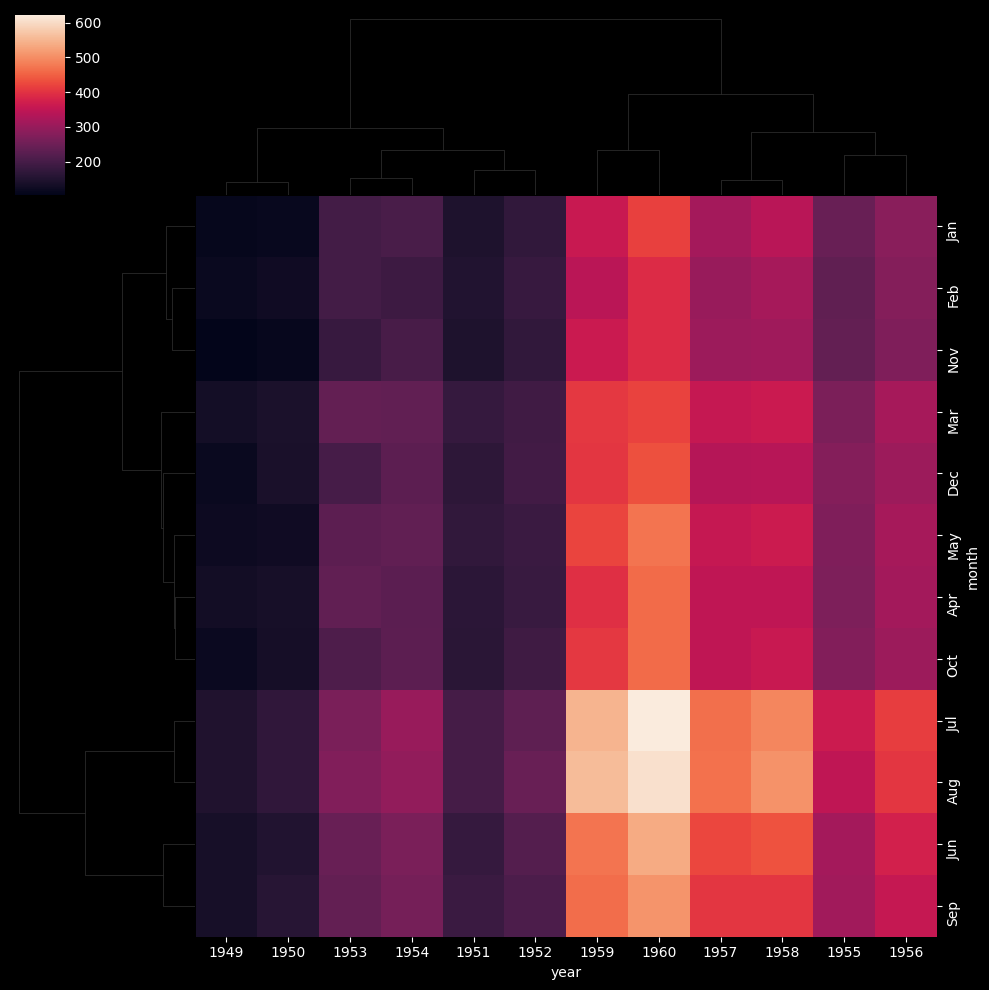

In [92]:
sns.clustermap(df.pivot_table(values='passengers', index='month', columns='year'))

<Axes: xlabel='year', ylabel='month'>

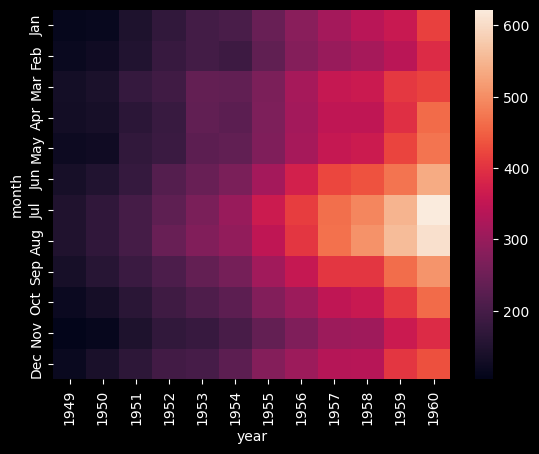

In [91]:
sns.heatmap(df.pivot_table(values='passengers', index='month', columns='year'))

In [10]:
from sklearn.preprocessing import FunctionTransformer

In [11]:
log1p_tr = FunctionTransformer(func=np.log1p)

<Axes: ylabel='Frequency'>

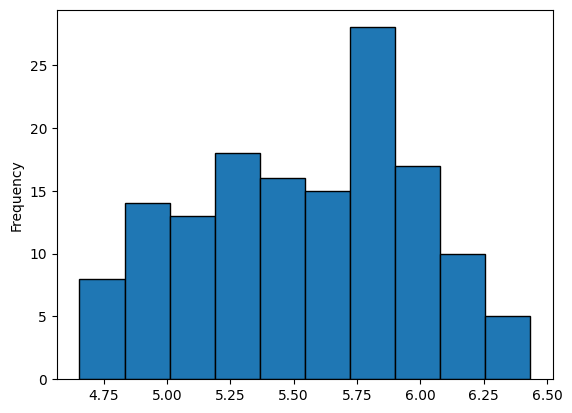

In [29]:
passenger_transformed = log1p_tr.fit_transform(df['passengers'])
passenger_transformed.plot(kind='hist', edgecolor='black')

In [35]:
square_tr = FunctionTransformer(func=np.square)
passenger_transformed_square = square_tr.fit_transform(passenger_transformed)

Text(0.5, 1.0, 'skewness : 0.002902148093166672')

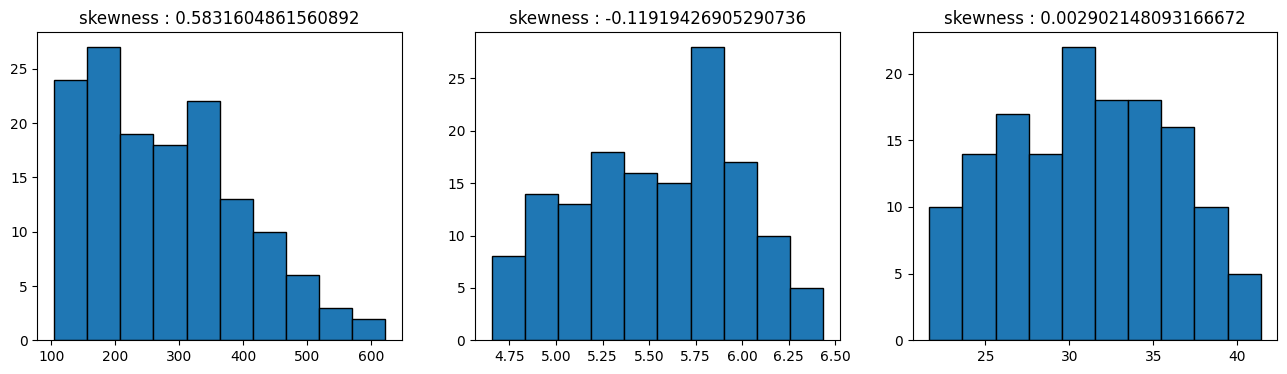

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))
axes[0].hist(df['passengers'], edgecolor='black')
axes[0].set_title(f"skewness : {df['passengers'].skew()}")

axes[1].hist(passenger_transformed, edgecolor='black')
axes[1].set_title(f"skewness : {passenger_transformed.skew()}")

axes[2].hist(passenger_transformed_square, edgecolor='black')
axes[2].set_title(f"skewness : {passenger_transformed_square.skew()}")


In [50]:
df.pivot_table(values='passangers', index='year', columns='month')

KeyError: 'passangers'